<a href="https://colab.research.google.com/github/asura69/ML-Training-/blob/main/webmining_da5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

18BCE0186<br>
ANUBHAV SINGH GULERIA<br>
DA - 5

Implement Decision tree classifier for breast cancer Wisconsin<br>
dataset (load_breast_cancer) and evaluate the algorithm with precision,<br> recall sensitivity
and specificity.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score 
from sklearn.model_selection import learning_curve, StratifiedKFold, train_test_split
from sklearn.feature_selection import RFECV, SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz 
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
data = np.c_[cancer.data, cancer.target]
columns = np.append(cancer.feature_names, ["target"])
sizeMeasurements = pd.DataFrame(data, columns=columns)
X = sizeMeasurements[sizeMeasurements.columns[:-1]]
y = sizeMeasurements.target
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)
print('\n Feature Names: \n\n', X.columns.values, "\n")


 Feature Names: 

 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'] 



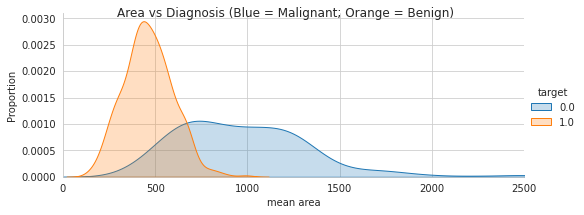

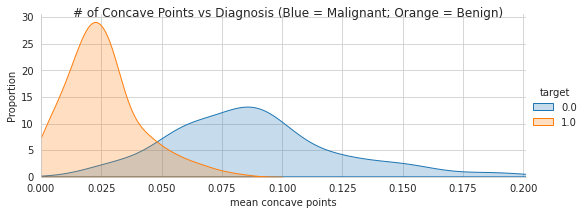

In [3]:
sns.set_style("whitegrid")
plotOne = sns.FacetGrid(sizeMeasurements, hue="target",aspect=2.5)
plotOne.map(sns.kdeplot,'mean area',shade=True)
plotOne.set(xlim=(0, sizeMeasurements['mean area'].max()))
plotOne.add_legend()
plotOne.set_axis_labels('mean area', 'Proportion')
plotOne.fig.suptitle('Area vs Diagnosis (Blue = Malignant; Orange = Benign)')
plt.show()

sns.set_style("whitegrid")
plotTwo = sns.FacetGrid(sizeMeasurements, hue="target",aspect=2.5)
plotTwo.map(sns.kdeplot,'mean concave points',shade= True)
plotTwo.set(xlim=(0, sizeMeasurements['mean concave points'].max()))
plotTwo.add_legend()
plotTwo.set_axis_labels('mean concave points', 'Proportion')
plotTwo.fig.suptitle('# of Concave Points vs Diagnosis (Blue = Malignant; Orange = Benign)')
plt.show()


 Feature Names: 

 ['mean texture' 'mean area' 'mean symmetry'] 


Feature Correlation:



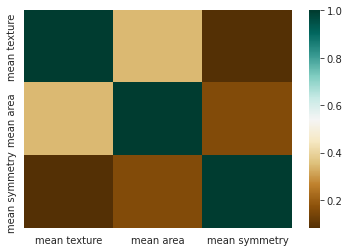

In [4]:
sizeMeasurements2 = sizeMeasurements.drop(['mean radius','mean perimeter',
 'mean smoothness', 'mean compactness', 'mean concavity',
 'mean concave points', 'mean fractal dimension',
 'radius error', 'texture error', 'perimeter error', 'area error',
 'smoothness error', 'compactness error', 'concavity error',
 'concave points error', 'symmetry error', 'fractal dimension error',
 'worst radius', 'worst perimeter', 
 'worst smoothness', 'worst compactness', 
 'worst concave points', 'worst symmetry', 'worst fractal dimension','worst texture', 'worst area',
 'worst concavity'], axis=1)
X2 = sizeMeasurements2[sizeMeasurements2.columns[:-1]]
y2 = sizeMeasurements2.target
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, y2, test_size=0.2)
print('\n Feature Names: \n\n', X2.columns.values, "\n")
print("\nFeature Correlation:\n")
g = sns.heatmap(X_train2.corr(),cmap="BrBG",annot=False)


 Feature Names: 

 [0 1 2 3 4] 


Feature Correlation:



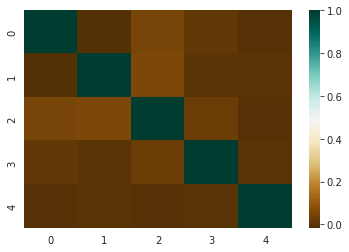

In [5]:

from sklearn.decomposition import PCA
X3=X
y3=y
variance_pct = 5 # Minimum percentage of variance we want to be described by the resulting transformed components
pca = PCA(n_components=variance_pct) # Create PCA object
X_transformed = pca.fit_transform(X3,y3) # Transform the initial features
X3pca = pd.DataFrame(X_transformed) # Create a data frame from the PCA'd data
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X3pca, y3, test_size=0.2)
print('\n Feature Names: \n\n', X3pca.columns.values, "\n")
#print('First Few Values, After PCA: \n\n,',X3pca.head(),'\n\n')
print("\nFeature Correlation:\n")
g = sns.heatmap(X_train3.corr(),cmap="BrBG",annot=False)

In [6]:
clf1 = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=12)
clf1.fit(X_train, Y_train)
clf2 = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=12)
clf2.fit(X_train2, Y_train2)
clf3 = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=12)
clf3.fit(X_train3, Y_train3)
print('Accuracy of Decision Tree classifier on original training set: {:.2f}'.format(clf1.score(X_train, Y_train)))
print('Accuracy of Decision Tree classifier on original test set: {:.2f}'.format(clf1.score(X_test, Y_test)))
print('Accuracy of Decision Tree classifier on reduced training set: {:.2f}'.format(clf2.score(X_train2, Y_train2)))
print('Accuracy of Decision Tree classifier on reduced test set: {:.2f}'.format(clf2.score(X_test2, Y_test2)))
print('Accuracy of Decision Tree classifier on PCA-transformed training set: {:.2f}'.format(clf3.score(X_train3, Y_train3)))
print('Accuracy of Decision Tree classifier on PCA-transformed test set: {:.2f}'.format(clf3.score(X_test3, Y_test3)))

Accuracy of Decision Tree classifier on original training set: 0.95
Accuracy of Decision Tree classifier on original test set: 0.94
Accuracy of Decision Tree classifier on reduced training set: 0.92
Accuracy of Decision Tree classifier on reduced test set: 0.88
Accuracy of Decision Tree classifier on PCA-transformed training set: 0.95
Accuracy of Decision Tree classifier on PCA-transformed test set: 0.96


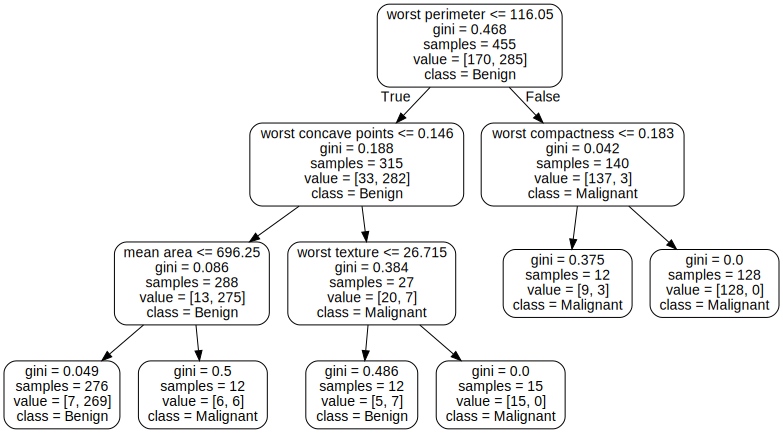

In [7]:

feature_names1 = X.columns.values
feature_names2 = X2.columns.values
feature_names3 = X3pca.columns.values

def plot_decision_tree1(a,b):
    dot_data = tree.export_graphviz(a, out_file=None, 
                             feature_names=b,  
                             class_names=['Malignant','Benign'],  
                             filled=False, rounded=True,  
                             special_characters=False)  
    graph = graphviz.Source(dot_data)  
    return graph 
plot_decision_tree1(clf1,feature_names1)

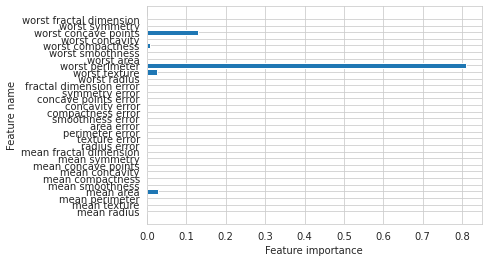

In [8]:
def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_names)
plot_feature_importances(clf1, feature_names1)

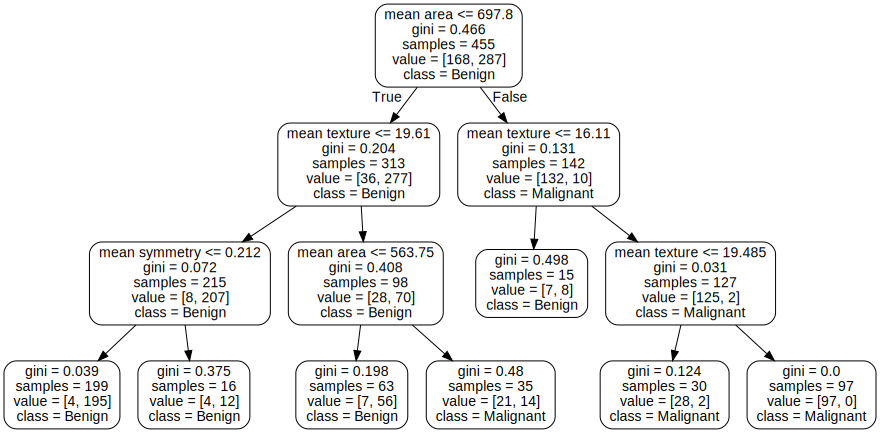

In [9]:
plot_decision_tree1(clf2,feature_names2)

Write a program to demonstrate the working of the simple Naïve bayes technique. Use
an appropriate data set for building the model and compute the ROC and AUC to classify
a new sample.


In [12]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=56)

In [15]:

# Fit a vanilla Logistic Regression classifier and make predictions
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)

In [16]:

# Function to calculate True Positive Rate and False Positive Rate

def calc_TP_FP_rate(y_true, y_pred):
    
    # Convert predictions to series with index matching y_true
    y_pred = pd.Series(y_pred, index=y_true.index)
    
    # Instantiate counters
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    # Determine whether each prediction is TP, FP, TN, or FN
    for i in y_true.index: 
        if y_true[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_true[i]!=y_pred[i]:
           FP += 1
        if y_true[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_test[i]!=y_pred[i]:
           FN += 1
    
    # Calculate true positive rate and false positive rate
    tpr = TP / (TP + FN)
    fpr = FP / (FP + TN)

    return tpr, fpr

# Test function

calc_TP_FP_rate(y_test, y_pred_test)

(0.6923076923076923, 0.1891891891891892)

In [17]:

# LOGISTIC REGRESSION (NO REGULARIZATION)

# Fit and predict test class probabilities
lr = LogisticRegression(max_iter=1000, penalty='none')
lr.fit(X_train, y_train)
y_test_probs = lr.predict_proba(X_test)[:,1]

# Containers for true positive / false positive rates
lr_tp_rates = []
lr_fp_rates = []

# Define probability thresholds to use, between 0 and 1
probability_thresholds = np.linspace(0,1,num=100)

# Find true positive / false positive rate for each threshold
for p in probability_thresholds:
    
    y_test_preds = []
    
    for prob in y_test_probs:
        if prob > p:
            y_test_preds.append(1)
        else:
            y_test_preds.append(0)
            
    tp_rate, fp_rate = calc_TP_FP_rate(y_test, y_test_preds)
        
    lr_tp_rates.append(tp_rate)
    lr_fp_rates.append(fp_rate)

In [18]:
# LOGISTIC REGRESSION (L2 REGULARIZATION)

# Fit and predict test class probabilities
lr_l2 = LogisticRegression(max_iter=1000, penalty='l2')
lr_l2.fit(X_train, y_train)
y_test_probs = lr_l2.predict_proba(X_test)[:,1]

# Containers for true positive / false positive rates
l2_tp_rates = []
l2_fp_rates = []

# Define probability thresholds to use, between 0 and 1
probability_thresholds = np.linspace(0,1,num=100)

# Find true positive / false positive rate for each threshold
for p in probability_thresholds:
    
    y_test_preds = []
    
    for prob in y_test_probs:
        if prob > p:
            y_test_preds.append(1)
        else:
            y_test_preds.append(0)
            
    tp_rate, fp_rate = calc_TP_FP_rate(y_test, y_test_preds)
        
    l2_tp_rates.append(tp_rate)
    l2_fp_rates.append(fp_rate)

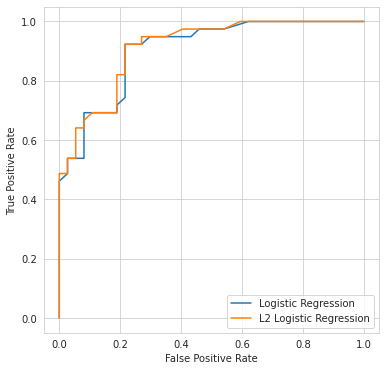

In [19]:
# Plot ROC curves

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(lr_fp_rates, lr_tp_rates, label='Logistic Regression')
ax.plot(l2_fp_rates, l2_tp_rates, label='L2 Logistic Regression')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend();

In [20]:
# Get AUC scores

from sklearn.metrics import auc

print(f'Logistic Regression (No reg.) AUC {auc(lr_fp_rates, lr_tp_rates)}')
print(f'Logistic Regression (L2 reg.) AUC {auc(l2_fp_rates, l2_tp_rates)}')

Logistic Regression (No reg.) AUC 0.9033264033264033
Logistic Regression (L2 reg.) AUC 0.910949410949411


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


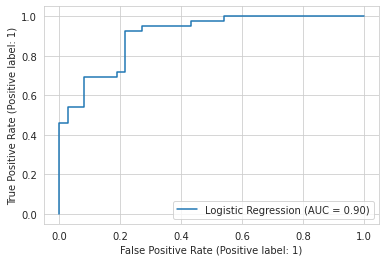

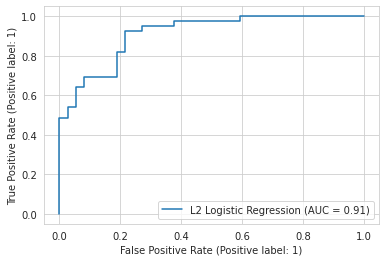

In [21]:
# Use sklearn to plot ROC curves

from sklearn.metrics import plot_roc_curve

plot_roc_curve(lr, X_test, y_test, name = 'Logistic Regression')
plot_roc_curve(lr_l2, X_test, y_test, name = 'L2 Logistic Regression');